# TP Finalez Visualización de Datos
### MiM + A - Universidad Torcuato Di Tella
##Magdalena Gonzalez Segura


# Analisis de las carreras CTIM en Argentina entre el año 2010 y 2016

Con la evolución de la tecnología comenzaron a nacer nuevas posiciones de trabajo, posiciones que el mercado laboral no está preparado para cubrir. Se cree que en Argentina aún existe una por parte de los recientes graduados de colegio a optar por carrera más tradicionales asociado a las ciencias sociales y/o economicas, dejando una brecha muy grande en esas nuevas posiciones del mercado.

El objetivo de este análisis es estudiar la posición de las carreras CTIM (conocidas como STEAM en ingles) ciencias, tecnología, ingeniería y matematicas aplicadas en la Argentina, si existe alguna tendencia por un genéro particular asi como ver el impacto de los esfuerzos del gobierno por incentivar estas carreras.

El análisis sera partiendo de la base de datos del estudio "Menos Mitos,Más datos" realizado por el INTAL BID junto con la ONG chicas en tecnología. La base fue modificada para fácilitar el estudio agregando diferenciadores de area de estudio y ubicación geográfica de las universidades. La misma se encuentra en https://proyectos.chicasentecnologia.org/masdatos/

El análisis va a estar distribuido en 2 fases: 
1) Analisis exploratorio de las carreras CTIM vs Non-CTIM para conocer su posición en el mercado estudiantil.
2) Análisis de tendencias según genero
Para futuros análisis se espera poner mayor foco sobre la distribución geográfica.




#### Sección Anexa
Carga y estructuracion de datos necesaria para la visualización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from scipy import stats
import seaborn as sns
import geopandas as gpd

In [3]:
#creamos el working directory
import os
os.getcwd
os.chdir('/Users/seguram/Documents/Visualizacion_datos')
#Apertura Tabla
df_raw = pd.read_csv("/Users/seguram/Documents/Visualizacion_datos/Mod_Datos_2010-2016.csv",delimiter=',')
#revision datos correctamente tomados y abiertos
np.shape(df_raw)
df_raw.head(200)

,Año,Tipo_de_Institucion,Provincia_Institucion,Interior_CABA,Institucion,Institucion_New,Unidad_Academica,Unidad_Academica_New,Carrera,Titulo,...,Egresados_Varones,Egresados_Mujeres,Tasa_de_Inscripcion_total,Tasa_de_graduacion_total,Tasa_de_Inscripcion_varon,Tasa_de_graduacion_varon,Tasa_de_Inscripcion_mujer,Tasa_de_graduacion_mujer,Tasa_de_Inscripcion_mujer_hombre,Tasa_de_graduacion_mujer_hombre
0,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Artes y Ciencias Musicales,Facultad de Artes y Ciencias Musicales,Musica,Licenciado en Composicion,...,11.0,NaN,0.277778,0.076389,0.675000,1.000000,0.325000,0.000000,0.481481,0.000000
1,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Artes y Ciencias Musicales,Facultad de Artes y Ciencias Musicales,Musica,Licenciado en Direccion Coral,...,1.0,1.0,0.000000,0.666667,0.000000,0.500000,0.000000,0.500000,0.000000,1.000000
2,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Artes y Ciencias Musicales,Facultad de Artes y Ciencias Musicales,Musica,Licenciado en Direccion Orquestal,...,10.0,5.0,0.188679,0.283019,0.800000,0.666667,0.200000,0.333333,0.250000,0.500000
3,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Artes y Ciencias Musicales,Facultad de Artes y Ciencias Musicales,Musica,Tecnico Universitario en Lenguaje Musical Basico,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Artes y Ciencias Musicales,Facultad de Artes y Ciencias Musicales,Musica,Tecnico Universitario en Produccion Musical Ap...,...,NaN,NaN,0.277778,0.000000,0.700000,0.000000,0.300000,0.000000,0.428571,0.000000
5,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Ciencias Agrarias,Facultad de Ciencias Agrarias,Administracion de Empresas Agropecuarias,Magister en Gestion de la Empresa Agroalimentaria,...,6.0,1.0,0.000000,0.166667,0.000000,0.857143,0.000000,0.142857,0.000000,0.166667
6,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Ciencias Agrarias,Facultad de Ciencias Agrarias,Produccion e Ingenieria Agropecuaria,Ingeniero en Produccion Agropecuaria,...,13.0,8.0,0.260000,0.060000,0.725275,0.619048,0.274725,0.380952,0.378788,0.615385
7,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Ciencias Agrarias,Facultad de Ciencias Agrarias,Produccion e Ingenieria Agropecuaria,Tecnico en Produccion Agropecuaria,...,NaN,2.0,0.220126,0.012579,0.771429,0.000000,0.228571,1.000000,0.296296,0.000000
8,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Ciencias Agrarias,Facultad de Ciencias Agrarias,Tecnologia e Ingenieria en Alimentos,Ingeniero en Alimentos,...,9.0,18.0,0.209459,0.182432,0.225806,0.333333,0.774194,0.666667,3.428571,2.000000
9,2010,Universidad,Ciudad Autonoma de Buenos Aires,CABA,Pontificia Universidad Catolica Argentina Sant...,Pontificia Universidad Catolica Argentina Sant...,Facultad de Ciencias Agrarias,Facultad de Ciencias Agrarias,Tecnologia e Ingenieria en Alimentos,Licenciado en Tecnologia de los 

In [4]:
#Revisamos si existen nulls
col_nulls = df_raw.isnull().any()
col_nulls

Año                                 False
Tipo_de_Institucion                 False
Provincia_Institucion                True
Interior_CABA                        True
Institucion                         False
Institucion_New                     False
Unidad_Academica                    False
Unidad_Academica_New                False
Carrera                             False
Titulo                              False
Gestion                             False
Nivel_de_la_Oferta                  False
Area_de_Estudio                     False
Total_de_Estudiantes                 True
Estudiantes_Varones                  True
Estudiantes_Mujeres                  True
Total_de_Nuevos_Inscriptos           True
Nuevos_Inscriptos_Varones            True
Nuevos_Inscriptos_Mujeres            True
Total_de_Reinscriptos                True
Reinscriptos_Varones                 True
Reinscriptos_Mujeres                 True
Total_de_Egresados                   True
Egresados_Varones                 

In [5]:
#Reemplazamos nulls por 0, NAN es no existencia de alumnos en esa carrera
df_raw.fillna(0, inplace=True)
col_nulls = df_raw.isnull().any()
col_nulls

Año                                 False
Tipo_de_Institucion                 False
Provincia_Institucion               False
Interior_CABA                       False
Institucion                         False
Institucion_New                     False
Unidad_Academica                    False
Unidad_Academica_New                False
Carrera                             False
Titulo                              False
Gestion                             False
Nivel_de_la_Oferta                  False
Area_de_Estudio                     False
Total_de_Estudiantes                False
Estudiantes_Varones                 False
Estudiantes_Mujeres                 False
Total_de_Nuevos_Inscriptos          False
Nuevos_Inscriptos_Varones           False
Nuevos_Inscriptos_Mujeres           False
Total_de_Reinscriptos               False
Reinscriptos_Varones                False
Reinscriptos_Mujeres                False
Total_de_Egresados                  False
Egresados_Varones                 

In [6]:
#Sum ifs por año y tipo de dato
total_egresados_año = df_raw.groupby(["Año"])["Total_de_Egresados"].sum()
total_inscriptos_año = df_raw.groupby(["Año"])["Total_de_Nuevos_Inscriptos"].sum()
total_estudiantes_año = df_raw.groupby("Año")["Total_de_Estudiantes"].sum()
total_estudiantes_v_año = df_raw.groupby("Año")["Estudiantes_Varones"].sum()
total_estudiantes_m_año = df_raw.groupby("Año")["Estudiantes_Mujeres"].sum()
total_egresados_v_año = df_raw.groupby("Año")["Egresados_Varones"].sum()
total_egresados_m_año = df_raw.groupby("Año")["Egresados_Mujeres"].sum()
total_inscriptos_v_año = df_raw.groupby("Año")["Nuevos_Inscriptos_Varones"].sum()
total_inscriptos_m_año = df_raw.groupby("Año")["Nuevos_Inscriptos_Mujeres"].sum()
#print (total_egresados_año)
#print (total_estudiantes_año)

In [26]:
#Pivot para analisis de alumnos y carreras CTIM
pivot_años_ctim = df_raw.pivot_table(index = "Año", columns = "Area_de_Estudio", values= ['Total_de_Egresados', "Total_de_Nuevos_Inscriptos","Total_de_Reinscriptos"], aggfunc= "sum")
#print(pivot_años_ctim)

In [24]:
#Pivot para analisis de graduación por genero
pivot_genero = df_raw.pivot_table(index='Año', values= ['Total_de_Egresados', "Egresados_Mujeres", "Egresados_Varones"],aggfunc= "sum")
#print(pivot_genero)

In [11]:
#Pivot para analisis de graduación por genero y carreras CTIM
pivot_genero_area = df_raw.pivot_table(index='Año', columns = "Area_de_Estudio", values= ['Total_de_Egresados', "Egresados_Mujeres", "Egresados_Varones"])
#print(pivot_genero_area)


In [12]:
#Pivot para analisis de graduación por genero y carreras CTIM - sin año
pivot_genero_area_noyear = df_raw.pivot_table(index="Area_de_Estudio", values= ["Nuevos_Inscriptos_Varones", "Nuevos_Inscriptos_Mujeres","Egresados_Mujeres", "Egresados_Varones"], aggfunc= "sum")
#print(pivot_genero_area_noyear)

In [13]:
#Pivot para analisis de graduación por nivel educativo
pivot_oferta_año = df_raw.pivot_table(index='Año', columns = "Nivel_de_la_Oferta", values= ['Total_de_Egresados', "Egresados_Mujeres", "Egresados_Varones"])
#print(pivot_oferta_año)

In [14]:
#Pivot para analizar la eficiencia en la graducacion y el atractivo de incripción por carrera y cantidad de alumnos
pivot_carreras = df_raw.pivot_table(index='Carrera', values= ["Total_de_Estudiantes","Tasa_de_graduacion_total", "Tasa_de_Inscripcion_total"])
#print(pivot_carreras)

In [23]:
df_raw_ctim = df_raw.loc[df_raw['Area_de_Estudio'] == 'CTIM']
#print(df_raw_ctim)

## Sección 1 
En esta sección buscamos entender si efectivamente existe una despropoción en los estudiantes interesados en las carreras CTIM y los que no, a su vez ver si las tasas de graduación entre estas carreras es similar o, si se puede suponer que más cercanos al mercado laboral los alumnos encuentran mayor incentivos por graduarse en CTIM u otro.

#### Análisis de la sección
Como veremos en los siguientes gráficos, desde el año 2014 se verifica una tendencia positiva de alumnos incribiendoce en carreras CTIM, achicando la brecha de inscripición. Aún asi, las tasas de graduaciones siguen siendo iguales, lo que nos deja suponer que no encuentran los incentivos correctos para permancer

In [16]:
df_raw.describe()

,Año,Total_de_Estudiantes,Estudiantes_Varones,Estudiantes_Mujeres,Total_de_Nuevos_Inscriptos,Nuevos_Inscriptos_Varones,Nuevos_Inscriptos_Mujeres,Total_de_Reinscriptos,Reinscriptos_Varones,Reinscriptos_Mujeres,...,Egresados_Varones,Egresados_Mujeres,Tasa_de_Inscripcion_total,Tasa_de_graduacion_total,Tasa_de_Inscripcion_varon,Tasa_de_graduacion_varon,Tasa_de_Inscripcion_mujer,Tasa_de_graduacion_mujer,Tasa_de_Inscripcion_mujer_hombre,Tasa_de_graduacion_mujer_hombre
count,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,...,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000,58840.000000
mean,2013.150629,235.670173,98.464548,132.020955,56.583787,23.981135,31.586965,166.875425,69.482359,93.224082,...,5.883243,9.131339,0.265147,0.105693,0.329544,0.298816,0.389916,0.398362,1.593720,1.205948
std,1.986152,938.430270,373.000222,557.765560,195.716808,80.195167,117.252114,767.176818,305.154438,454.385370,...,24.366307,40.175407,0.268927,0.252951,0.307470,0.348734,0.333878,0.389565,4.460645,3.521646
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,15.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,55.000000,20.000000,26.000000,15.000000,5.000000,6.000000,12.000000,3.000000,4.000000,...,1.000000,1.000000,0.215278,0.028846,0.300000,0.166667,0.413043,0.357143,0.541667,0.000000
75%,2015.000000,176.000000,69.000000,90.000000,49.000000,20.000000,25.000000,110.000000,41.000000,53.000000,...,4.000000,6.000000,0.376742,0.098039,0.545455,0.500000,0.666667,0.750000,1.717936,1.142857
max,2016.000000,37493.000000,15517.000000,21976.000000,8748.000000,3621.000000,6055.000000,32137.000000,13316.000000,18821.000000,...,1056.000000,1662.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,229.500000,152.000000


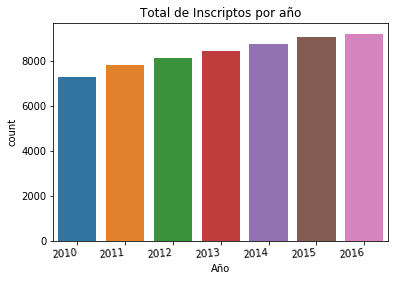

In [17]:
#Alumnos totales en universidades
ax = sns.countplot(x="Año", data=df_raw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=5, ha="right")
plt.title('Total de Inscriptos por año')
plt.show()

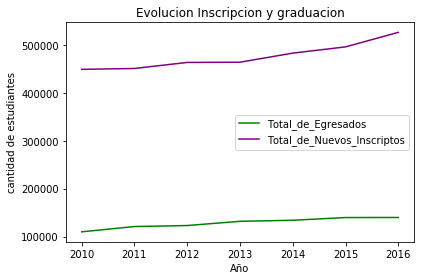

In [18]:
#Evolucion de inscripciones y graduaciones
total_egresados_año.plot.line(c ="green")
total_inscriptos_año.plot.line(c = "purple")
plt.ylabel("cantidad de estudiantes")
plt.title('Evolucion Inscripcion y graduacion')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

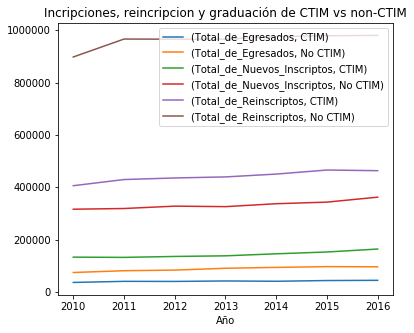

In [37]:
#Incentivos a las carreras CTIM vs Non-CTIM en el tiempo
pivot_años_ctim.plot.line(figsize=(6, 5))
plt.title('Incripciones, reincripcion y graduación de CTIM vs non-CTIM')
plt.legend(loc = "best")

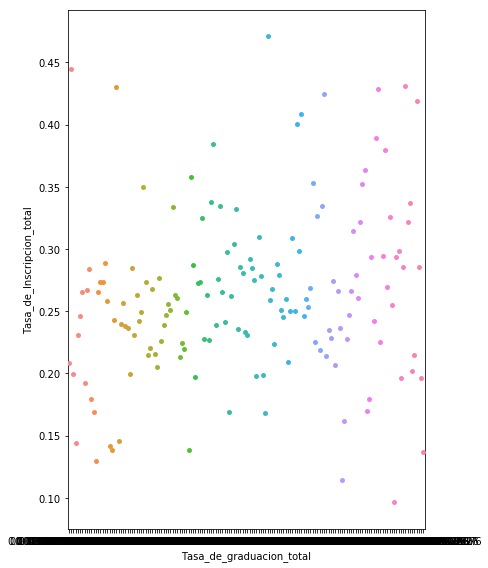

In [21]:
#Buscar carreras que tengan alta convocatoría y que tengan muchos graduados, mirado desde la cantidad de alumnos en ellas *grafico no funcio*
plt.figure(figsize=(12, 8))
plt.subplot(122) 
sns.swarmplot('Tasa_de_graduacion_total', 'Tasa_de_Inscripcion_total', data=pivot_carreras);
plt.tight_layout()
plt.show()

## Sección 2
Análisis foco en las carreras CTIM viendo tendencias en genero.

#### Análisis de la sección
A diferencia de lo que se supone, vemos que existe una tendencia positiva a la participación de mujeres en las CTIM que exceden donde en números totales superan a los hombres. Viendo más en detalle la información, en las carreras especificas de tecnología sigue existiendo una baja presencia de mujeres y es por eso que se destaca la poca participación de las mujeres en CTIM, siendo el area de salud la que más compensa.

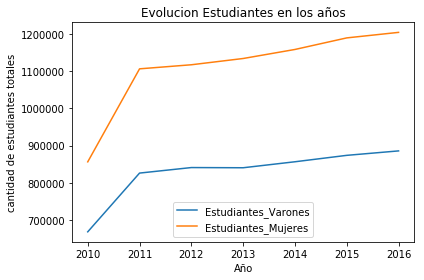

In [36]:
total_estudiantes_v_año.plot.line()
total_estudiantes_m_año.plot.line()
plt.ylabel("cantidad de estudiantes totales")
plt.title('Evolucion participación en carreras por genero')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

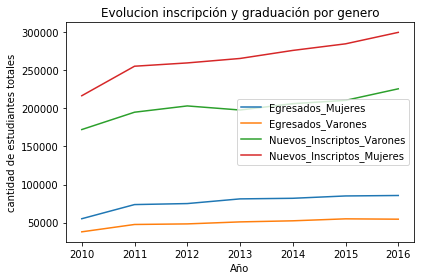

In [47]:
total_egresados_m_año.plot.line()
total_egresados_v_año.plot.line()
total_inscriptos_v_año.plot.line()
total_inscriptos_m_año.plot.line()
plt.ylabel("cantidad de estudiantes totales")
plt.title('Evolucion inscripción y graduación por genero')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Graduaciones con respecto a los años por genero')

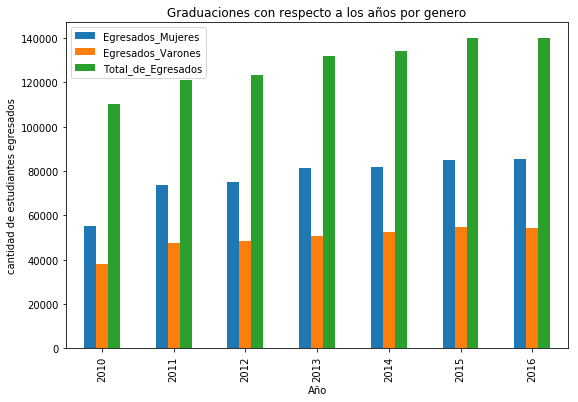

In [41]:
#Graficamos cantidad de alumnos por etapa y año
pivot_genero.plot.bar(figsize = (9, 6))
plt.ylabel("cantidad de estudiantes egresados")
plt.title('Graduaciones con respecto a los años por genero')

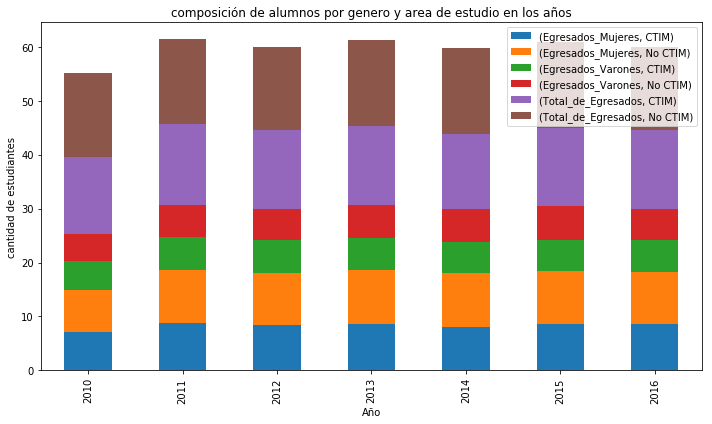

In [54]:
pivot_genero_area.plot.bar(stacked = "True", figsize = (10, 6))
plt.figsize = (12, 8)
plt.ylabel("cantidad de estudiantes")
plt.title('composición de alumnos por genero y area de estudio en los años')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

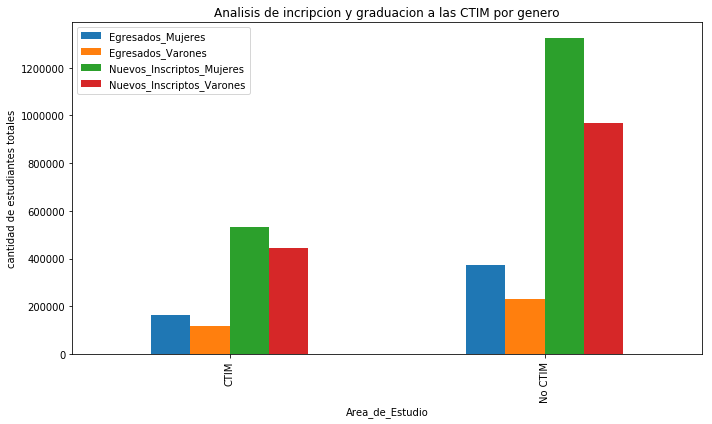

In [55]:
#Analisis de incripcion y graduacion a las CTIM por genero
pivot_genero_area_noyear.plot.bar(figsize = (10, 6))
plt.ylabel("cantidad de estudiantes totales")
plt.title('Analisis de incripcion y graduacion a las CTIM por genero')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()